In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
import sys
sys.path.append("..")
from util.oneDTravelWave import oneDTravelWave
from scipy.optimize import least_squares
from scipy.io import loadmat
import matplotlib as mpl

In [2]:
from fittingOneDTravelWave import fittingOneDTravelWave

In [3]:
data = loadmat('../data/phase_field_oneD_simulation_beginning_stage.mat')

In [4]:
x = np.squeeze(data['x'])
t = np.squeeze(data['t'])
phase_fields = data['usol']

In [5]:
fit = fittingOneDTravelWave(phase_fields=phase_fields, x=x,t=t,num_time_step_between_frame=1)

In [6]:
paras = fit.perform_fitting(init_values=[20., 5., -0.4],predict_interval=1)

In [7]:
prediction = fit.prediction()

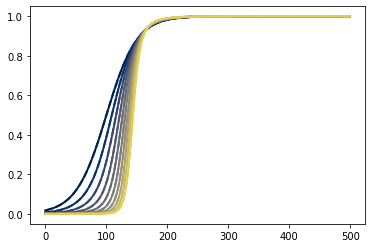

In [8]:
cmap = mpl.cm.cividis
step = 50
for i in range(0,len(phase_fields[0])-1, step):
    plt.plot(prediction[:,i],linestyle='--',color=cmap(i / float(len(phase_fields[0])-1)),linewidth=2)
    plt.plot(phase_fields[:,i],linestyle='-',color=cmap(i / float(len(phase_fields[0])-1)),linewidth=2)
#plt.legend()

In [9]:
paras

array([ 9.99999896,  0.99999996, -0.4       ])

In [18]:
data = loadmat('../data/phase_field_oneD_simulation_beginning_stage_0.02noise.mat')
x = np.squeeze(data['x'])
t = np.squeeze(data['t'])
phase_fields = data['usol']
fit = fittingOneDTravelWave(phase_fields=phase_fields, x=x,t=t,num_time_step_between_frame=1)

In [21]:
paras = fit.perform_fitting(init_values=[20., 5., -1.],predict_interval=1)

In [22]:
paras

array([16.26406182,  3.16498585, -0.30899464])

In [42]:
data = loadmat('../data/phase_field_oneD_experiment.mat')
x = np.squeeze(data['x'])
t = np.squeeze(data['t'])
phase_fields = data['usol']

In [50]:
from scipy.signal import savgol_filter
phase_fields_filtered = np.zeros_like(phase_fields)
shape = phase_fields.shape
for i in range(shape[1]):
    phase_fields_filtered[:,i] = savgol_filter(phase_fields[:,i], 11,1)

In [71]:
fit = fittingOneDTravelWave(phase_fields=phase_fields_filtered, x=x,t=t,num_time_step_between_frame=50)

In [108]:
paras = fit.perform_fitting(init_values=[2.5, 50., -23.],predict_interval=60)

In [109]:
paras

array([19.48021579,  2.99183139, -1.62154175])

In [110]:
prediction = fit.prediction()

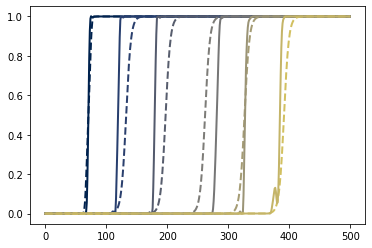

In [113]:
cmap = mpl.cm.cividis
step = 10
length = 60
for i in range(0,length, step):
    plt.plot(prediction[:,i],linestyle='--',color=cmap(i / float(length)),linewidth=2)
    plt.plot(phase_fields[:,i],linestyle='-',color=cmap(i / float(len(phase_fields[0])-1)),linewidth=2)
#plt.legend()